<a href="https://colab.research.google.com/github/gouri1125/ict_project/blob/main/Supervised_learning_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CASE STUDY CUSTOMER CHURN PREDICTION

1 EDA

In [442]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier# knn
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB# navie bayes
from sklearn.tree import DecisionTreeClassifier

In [443]:
customer=pd.read_csv('/content/Training_data.csv')

In [444]:
customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,5649-RXQTV,Male,0,No,No,51,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.00,5038.15,No
5630,3908-MKIMJ,Male,1,Yes,No,68,No,No phone service,DSL,Yes,...,Yes,No,No,No,Two year,Yes,Electronic check,41.95,2965.75,No
5631,4277-BWBML,Male,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1322.85,No
5632,9110-HSGTV,Female,0,No,No,69,Yes,No,DSL,NaN,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.45,5555.3,No


In [445]:
customer.shape

(5634, 21)

In [446]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [447]:
customer.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5240.000000
mean,0.159744,32.606851,65.102052
std,0.366401,24.614976,30.056443
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,36.800000
50%,0.000000,29.000000,70.650000
75%,0.000000,56.000000,90.050000
max,1.000000,72.000000,118.750000


In [448]:
customer.duplicated()
 #here no duplicate values on the dataset.

,0
0,False
1,False
2,False
3,False
4,False
...,...
5629,False
5630,False
5631,False
5632,False


In [449]:
customer.nunique()

,0
customerID,5634
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


MISSING VALUE REPLACE

In [450]:
customer.isna().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


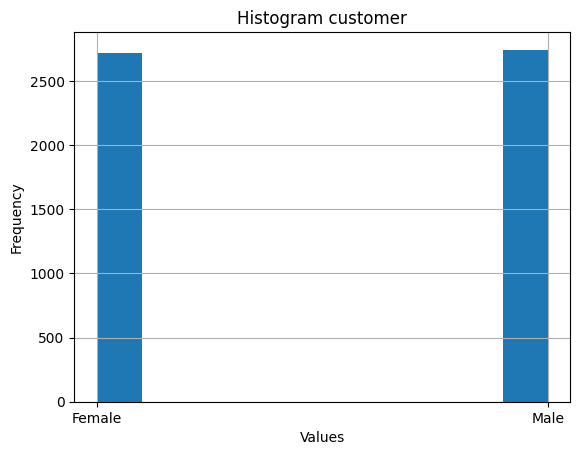

In [451]:
customer['gender'].dropna().hist()
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram customer')
plt.show()

In [452]:
customer['gender'] = customer['gender'].fillna('Unknown')


In [453]:
customer=pd.read_csv('/content/Training_data.csv')

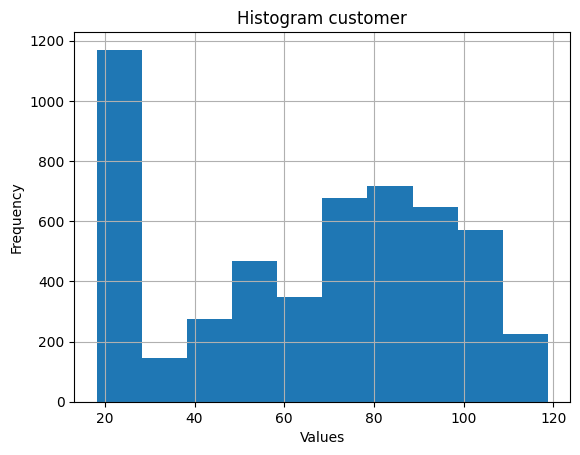

In [454]:
#2
customer['MonthlyCharges'].dropna().hist()

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram customer')
plt.show()


In [455]:
customer['MonthlyCharges']=customer['MonthlyCharges'].fillna(customer['MonthlyCharges'].median())
customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,5649-RXQTV,Male,0,No,No,51,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.00,5038.15,No
5630,3908-MKIMJ,Male,1,Yes,No,68,No,No phone service,DSL,Yes,...,Yes,No,No,No,Two year,Yes,Electronic check,41.95,2965.75,No
5631,4277-BWBML,Male,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1322.85,No
5632,9110-HSGTV,Female,0,No,No,69,Yes,No,DSL,NaN,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.45,5555.3,No


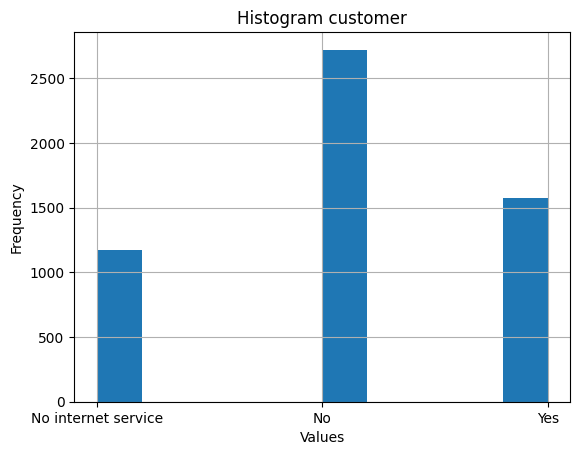

In [456]:
#3
customer['OnlineSecurity'].dropna().hist()
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram customer')
plt.show()

In [457]:
customer['OnlineSecurity'].fillna(customer['OnlineSecurity'].mode()[0],inplace=True)

/tmp/ipython-input-1481440971.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer['OnlineSecurity'].fillna(customer['OnlineSecurity'].mode()[0],inplace=True)


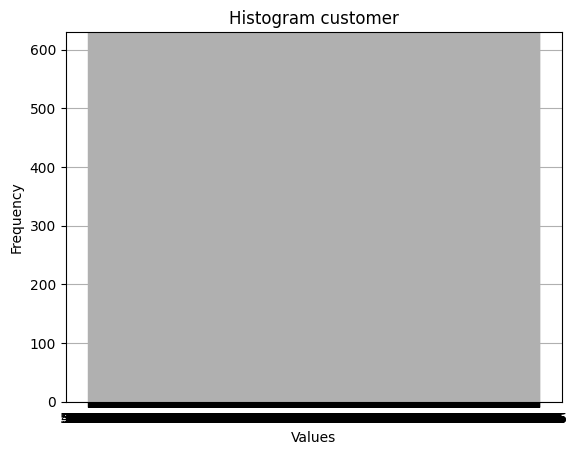

In [458]:
#4
customer['TotalCharges'].dropna().hist()
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram customer')
plt.show()

In [459]:
customer['TotalCharges'].fillna(customer['TotalCharges'].mode()[0],inplace=True)

/tmp/ipython-input-2299608534.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer['TotalCharges'].fillna(customer['TotalCharges'].mode()[0],inplace=True)


In [460]:
customer.isnull().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


OUTLIER HANDLING

In [461]:
customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,No,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,5649-RXQTV,Male,0,No,No,51,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.00,5038.15,No
5630,3908-MKIMJ,Male,1,Yes,No,68,No,No phone service,DSL,Yes,...,Yes,No,No,No,Two year,Yes,Electronic check,41.95,2965.75,No
5631,4277-BWBML,Male,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1322.85,No
5632,9110-HSGTV,Female,0,No,No,69,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.45,5555.3,No


In [462]:
#outlier detection
import pandas as pd

# Select numeric columns from customer dataset
num_cols = customer.select_dtypes(include=['int64', 'float64']).columns

outlier_summary = {}

for col in num_cols:
    Q1 = customer[col].quantile(0.25)
    Q3 = customer[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outlier_count = ((customer[col] < lower_bound) |
                     (customer[col] > upper_bound)).sum()

    outlier_summary[col] = outlier_count

outlier_summary


{'SeniorCitizen': np.int64(900),
 'tenure': np.int64(0),
 'MonthlyCharges': np.int64(0)}

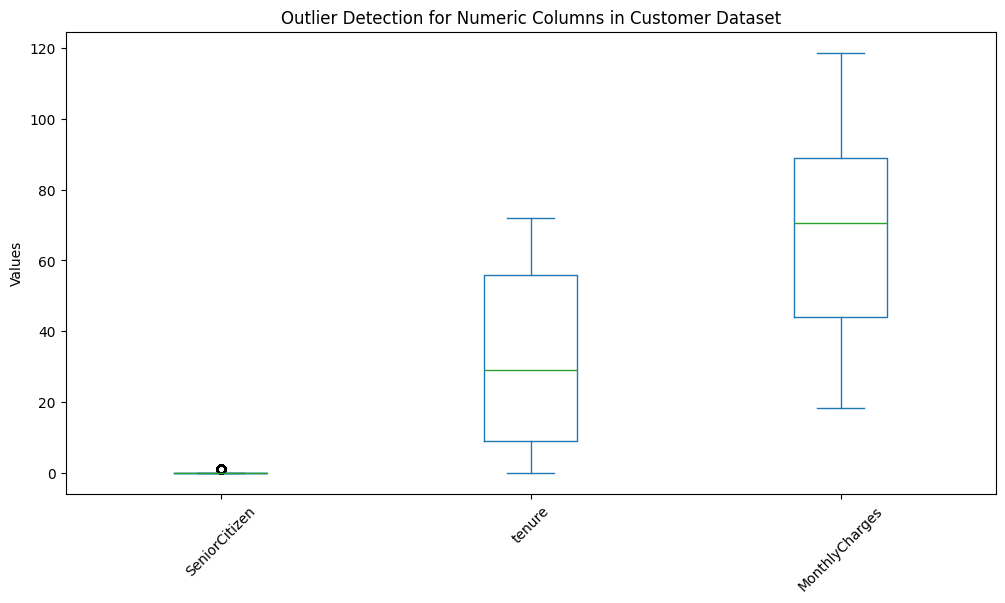

In [463]:
#outlier vishualise
import matplotlib.pyplot as plt

# Select all numeric columns
num_cols = customer.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplots
customer[num_cols].plot(kind='box', figsize=(12,6))

plt.title('Outlier Detection for Numeric Columns in Customer Dataset')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


<Axes: >

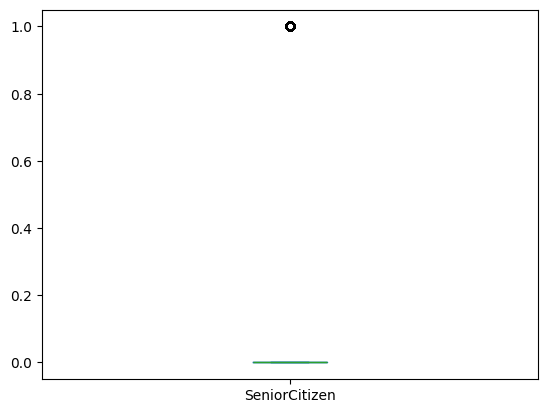

In [464]:
customer[['SeniorCitizen']].plot(kind='box')

In [465]:
for col in num_cols:
    Q1 = customer[col].quantile(0.25)
    Q3 = customer[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    customer[col] = customer[col].clip(lower, upper)

<Axes: >

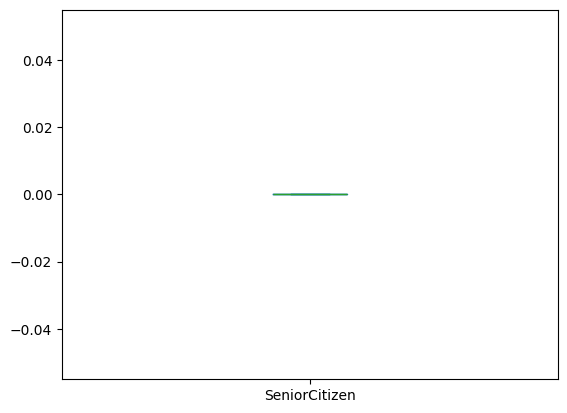

In [466]:
customer[['SeniorCitizen']].plot(kind='box')

FEATURE ENGINEERING

In [467]:
# customer= customer.select_dtypes(include=['number'])
# corr=customer.corr()
# corr

<Axes: >

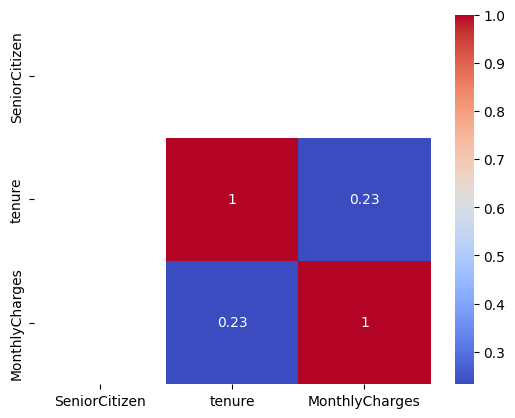

In [473]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

ENCODING

In [470]:
customer

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,No,35,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,Female,0,No,No,28,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,Male,0,No,No,56,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,Male,0,Yes,No,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,Female,0,Yes,Yes,43,No,No phone service,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,Male,0,No,No,51,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.00,5038.15,No
5630,Male,0,Yes,No,68,No,No phone service,DSL,Yes,Yes,Yes,No,No,No,Two year,Yes,Electronic check,41.95,2965.75,No
5631,Male,0,Yes,Yes,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1322.85,No
5632,Female,0,No,No,69,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.45,5555.3,No


In [471]:
customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,No,35,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,Female,0,No,No,28,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,Male,0,No,No,56,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,Male,0,Yes,No,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,Female,0,Yes,Yes,43,No,No phone service,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


In [469]:
customer =  customer.drop(columns=['customerID'])

In [472]:
#one-hot encoding
cat_cols = [
    'gender',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]

customer_new = pd.get_dummies(
    customer,
    columns=cat_cols,
    drop_first=True,
    dtype=int
)

In [474]:
customer_new['Churn'] = customer_new['Churn'].map({'Yes': 1, 'No': 0})
#for sinle column encodeing, separate encod  because target column
customer_new

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,35,20.75,700.45,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,1
1,0,28,35.75,961.4,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,0,56,98.60,5581.05,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
3,0,39,20.45,790,0,1,1,0,1,0,...,1,0,1,0,0,1,1,0,0,0
4,0,43,51.25,2151.6,0,0,1,1,0,1,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0,51,99.00,5038.15,0,1,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
5630,0,68,41.95,2965.75,0,1,1,0,0,1,...,0,0,0,0,0,1,1,0,1,0
5631,0,72,19.95,1322.85,0,1,1,1,1,0,...,1,0,1,0,0,1,0,0,0,0
5632,0,69,82.45,5555.3,0,0,0,0,1,0,...,0,1,0,1,0,1,1,1,0,0


In [475]:
customer_new.dtypes


,0
SeniorCitizen,int64
tenure,int64
MonthlyCharges,float64
TotalCharges,object
Churn,int64
gender_Male,int64
Partner_Yes,int64
Dependents_Yes,int64
PhoneService_Yes,int64
MultipleLines_No phone service,int64


In [476]:
customer_new['TotalCharges'] = pd.to_numeric(
    customer_new['TotalCharges'],
    errors='coerce'
)


In [477]:
customer_new['TotalCharges'].fillna(
    customer_new['TotalCharges'].median(),
    inplace=True
)


/tmp/ipython-input-4107325635.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_new['TotalCharges'].fillna(


In [478]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Continuous numeric columns,exclude one-hot encoded columns.
num_cols = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges'
]


# **TESTING DATA PREPROCESSING**

In [479]:
customer_test=pd.read_csv('/content/Testing_data.csv')

In [480]:
customer_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374,No


In [481]:
customer_test.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [482]:
customer_test.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1404,False
1405,False
1406,False
1407,False


In [483]:
customer_test =  customer_test.drop(columns=['customerID'])

In [484]:
cat_cols = [
    'gender',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]

customer_test = pd.get_dummies(
    customer_test,
    columns=cat_cols,
    drop_first=True,
    dtype=int
)


In [485]:
customer_test['Churn'] = customer_test['Churn'].map({'No': 0, 'Yes': 1})


In [500]:
customer_test['TotalCharges'] = pd.to_numeric(
    customer_test['TotalCharges'],
    errors='coerce'
)

customer_test['TotalCharges'].fillna(
    customer_test['TotalCharges'].median(),
    inplace=True
)

/tmp/ipython-input-3316927379.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_test['TotalCharges'].fillna(


## ML MODELLING

In [487]:
# Separate features and target
X_train = customer_new.drop('Churn', axis=1)
y_train = customer_new['Churn']

X_test = customer_test.drop('Churn', axis=1)
y_test = customer_test['Churn']

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [488]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [489]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [490]:
y_pred = model.predict(X_test)


In [491]:
y_prob = model.predict_proba(X_test)[:, 1]


In [492]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    model,
    X_train,
    y_train,
    cv=cv,
    scoring='roc_auc'
)

print("CV ROC-AUC scores:", cv_scores)
print("Mean CV ROC-AUC:", cv_scores.mean())


CV ROC-AUC scores: [0.85508153 0.85052649 0.86698897 0.83797149 0.81845843]
Mean CV ROC-AUC: 0.8458053837222709


In [493]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))

Accuracy: 0.8069552874378992
ROC-AUC: 0.8356348081666929
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1044
           1       0.65      0.56      0.60       365

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [494]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
#initializing the model
KNN_classifier = KNeighborsClassifier(n_neighbors= 1,metric='euclidean')
#training the model
KNN_classifier.fit(X_train,y_train)
#predict using the trained Ml model
y_pred_knn=KNN_classifier.predict(X_test)
#Evaluate the ML model
Acc_knn=accuracy_score(y_test,y_pred_knn)
pred_knn=precision_score(y_test,y_pred_knn)
Rec_knn=recall_score(y_test,y_pred_knn)
f1_knn=f1_score(y_test,y_pred_knn)
print("the accuracy",Acc_knn)
print("the precision",pred_knn)
print("the recall",Rec_knn)
print("the f1_score",f1_knn)
confusion_matrix(y_test,y_pred_knn)

the accuracy 0.7317246273953159
the precision 0.48320413436692505
the recall 0.5123287671232877
the f1_score 0.4973404255319149


array([[844, 200],
       [178, 187]])

In [495]:
#NAVIE-BAYES
#initializing the model
navie_baye_classifier =GaussianNB()
#training the model
navie_baye_classifier.fit(X_train,y_train)
#predict using the trained Ml model
y_pred_nb=navie_baye_classifier.predict(X_test)
#Evaluate the ML model
Acc_nb=accuracy_score(y_test,y_pred_nb)
pred_nb=precision_score(y_test,y_pred_nb)
Rec_nb=recall_score(y_test,y_pred_nb)
f1_nb=f1_score(y_test,y_pred_nb)
print("the accuracy",Acc_nb)
print("the precision",pred_nb)
print("the recall",Rec_nb)
print("the f1_score",f1_nb)
confusion_matrix(y_test,y_pred_nb)


the accuracy 0.6437189496096523
the precision 0.41022280471821754
the recall 0.8575342465753425
the f1_score 0.5549645390070922


array([[594, 450],
       [ 52, 313]])

In [496]:
#DECISION TREE
#initializing the model
DT_classifier = DecisionTreeClassifier()
#training the model
DT_classifier.fit(X_train,y_train)
#predict using the trained Ml model
y_pred_dt=DT_classifier.predict(X_test)
#Evaluate the ML model
Acc_dt=accuracy_score(y_test,y_pred_dt)
pred_dt=precision_score(y_test,y_pred_dt)
Rec_dt=recall_score(y_test,y_pred_dt)
f1_dt=f1_score(y_test,y_pred_dt)
print("the accuracy",Acc_dt)
print("the precision",pred_dt)
print("the recall",Rec_dt)
print("the f1_score",f1_dt)
confusion_matrix(y_test,y_pred_dt)

the accuracy 0.7324343506032647
the precision 0.48507462686567165
the recall 0.5342465753424658
the f1_score 0.5084745762711864


array([[837, 207],
       [170, 195]])

In [502]:
#we alredy have to split the data into features and target
model_DT = DecisionTreeClassifier()
model_NB = GaussianNB()
model_KNN = KNeighborsClassifier(n_neighbors = 1)
model_LR = LogisticRegression()
#define the number of folds to be considerd for cross validtaion
k_fold = KFold(n_splits = 5,shuffle = True)

#executing cross validation on training dataset x_train and y_train, selected KNN model
cv_score_KNN = cross_val_score(model_KNN, X_train, y_train, cv = k_fold)
#use this KNN  model for y prediction
model_KNN.fit(X_train,y_train)
y_pred_cv_knn = model_KNN.predict(X_test)
Acc_knn_cv = accuracy_score(y_test, y_pred_cv_knn)

print('KNN cross validation accuracies', cv_score_KNN)
print('KNN cross validation mean accuracies', cv_score_KNN.mean() )
print('the test accuracie of cv_KNN model is:',Acc_knn_cv)# previous segment
print('***************************************')

cv_score_NB = cross_val_score(model_NB, X_train, y_train, cv = k_fold)
model_NB.fit(X_train,y_train)
y_pred_cv_NB = model_NB.predict(X_test)
Acc_NB_cv = accuracy_score(y_test, y_pred_cv_NB)

print('NB cross validation accuracies', cv_score_NB)
print('NB cross validation mean accuracies', cv_score_NB.mean() )
print('the test accuracie of NB model is:',Acc_NB_cv)# previous segment
print('***************************************')

cv_score_DT = cross_val_score(model_DT, X_train, y_train, cv = k_fold)
model_DT.fit(X_train,y_train)
y_pred_cv_DT = model_DT.predict(X_test)
Acc_DT_cv = accuracy_score(y_test, y_pred_cv_DT)

print('DT cross validation accuracies', cv_score_DT)
print('DT cross validation mean accuracies', cv_score_DT.mean() )
print('the test accuracie of DT model is:',Acc_DT_cv)# previous segment
print('***************************************')

cv_score_LR = cross_val_score(model_LR, X_train, y_train, cv = k_fold)
model_LR.fit(X_train,y_train)
y_pred_cv_LR = model_LR.predict(X_test)
Acc_LR_cv = accuracy_score(y_test, y_pred_cv_LR)

print('LR cross validation accuracies', cv_score_LR)
print('LR cross validation mean accuracies', cv_score_LR.mean() )
print('the test accuracie of LR model is:',Acc_LR_cv)

KNN cross validation accuracies [0.70629991 0.76131322 0.73735581 0.7284827  0.72291297]
KNN cross validation mean accuracies 0.7312729215556791
the test accuracie of cv_KNN model is: 0.7317246273953159
***************************************
NB cross validation accuracies [0.67701863 0.64773736 0.65306122 0.66459627 0.67761989]
NB cross validation mean accuracies 0.6640066761124095
the test accuracie of NB model is: 0.6437189496096523
***************************************
DT cross validation accuracies [0.71073647 0.73913043 0.71517303 0.70097604 0.71758437]
DT cross validation mean accuracies 0.7167200682110824
the test accuracie of DT model is: 0.7246273953158269
***************************************
LR cross validation accuracies [0.78438332 0.82431233 0.7755102  0.81277728 0.79396092]
LR cross validation mean accuracies 0.7981888129411933
the test accuracie of LR model is: 0.8069552874378992


HERE THE LOGISTIC REGRESSION MODEL IS BEST ,CV ACCURACY 79 AND TEST ACCURACY 80.